## Boston DataSet
**Note:** This is a really popular dataset, commonly used as an introduction to machine learning. It is a free dataset and comes as part of the sklearn package. The data to be analyzed were collected by Harrison and Rubinfeld in 1978 for the purpose of discovering whether or not clean air influenced the value of houses in Boston.  

I have modified the original dataset and put it in csv format for you, as that is what you are most familiar with. 

This content is taken from: https://towardsdatascience.com/linear-regression-on-df-housing-dataset-f409b7e4a155  
As always, modifications have been made.

### What is Linear Regression?  

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). 

Linear regression can be further divided into two types of the algorithm:

Simple Linear Regression:
* If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.  

Multiple Linear Regression:
* If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.


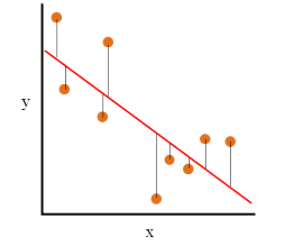  

**You should read this article before you begin:** https://www.javatpoint.com/linear-regression-in-machine-learning  


### Understanding the Dataset  
CRIM: Per capita crime rate by town  
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft  
INDUS: Proportion of non-retail business acres per town  
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
NOX: Nitric oxide concentration (parts per 10 million)  
RM: Average number of rooms per dwelling  
AGE: Proportion of owner-occupied units built prior to 1940  
DIS: Weighted distances to five Boston employment centers  
RAD: Index of accessibility to radial highways  
TAX: Full-value property tax rate per $10,000  
PTRATIO: Pupil-teacher ratio by town  
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town  
LSTAT: Percentage of lower status of the population  
MEDV: median value of owner occupied homes in 1000s  

### What are we trying to do here?  
* In this task we will be selecting **some** of the features (columns) in the dataset and using them to see if we can accurately predict the MEDV value of houses in Boston in 1978.
* We will split the dataset into training and testing sets.
* We will fit our linear regression model to the training set, so that the algorithm can use our data to 'learn'.
* We will measure the success of our algorithm using a variety of evaluation methods - in other words we want to be able to see how accurate our algorithm is at making predictions - not necessarily if it is correct or not, but rather how close the prediction was.

In [1]:
#importing libraries - look at the number of libraries here already
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Dataset

In [2]:
#Read in the datafile and view the head
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#View the shape of the DataFrame
df.shape

(506, 14)

In [4]:
#Examine the datatypes
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
#Describe the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#Check for null values in the DataFrame
df.isnull().sum()
# or
# df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis  
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.  

#### DISPLOT  
We will plot the distribution of the target variable MEDV.   

c:\Users\JordanFujitsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


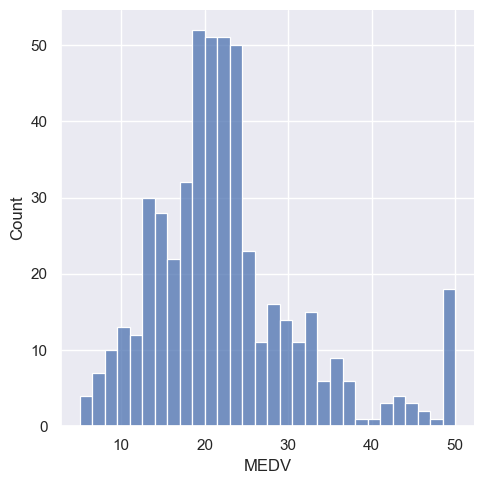

In [7]:
#Create a simple displot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df['MEDV'], bins=30)
plt.show()

**From, the diagram above we see that the values of MEDV are distributed normally with few outliers.**

#### CORRELATION MATRIX  

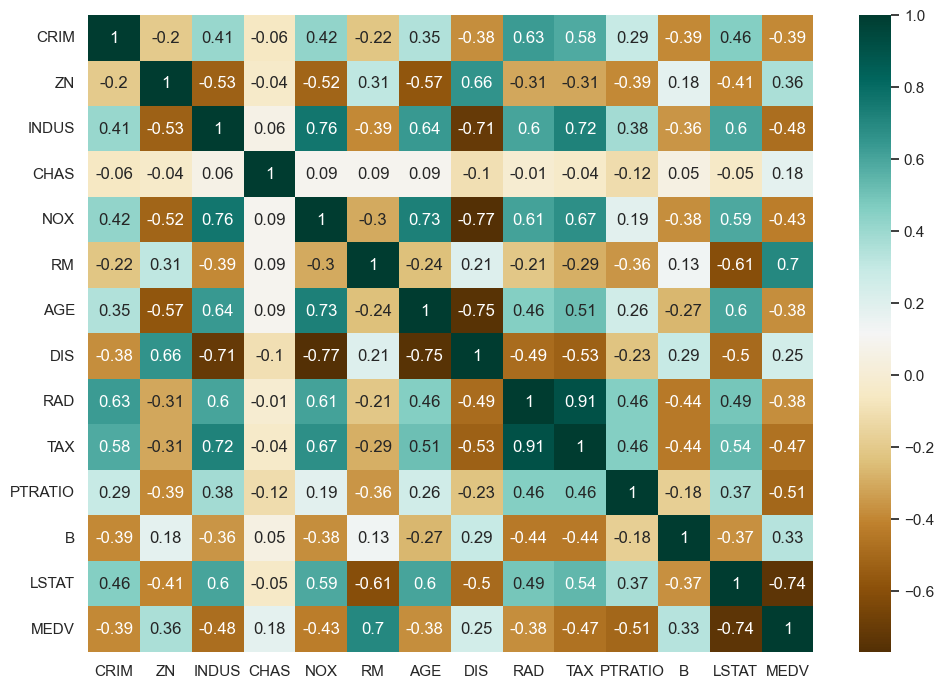

In [30]:
#Create a correlation matrix that measures the linear relationships between the variables. 
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, cmap='BrBG', annot=True)
plt.show()

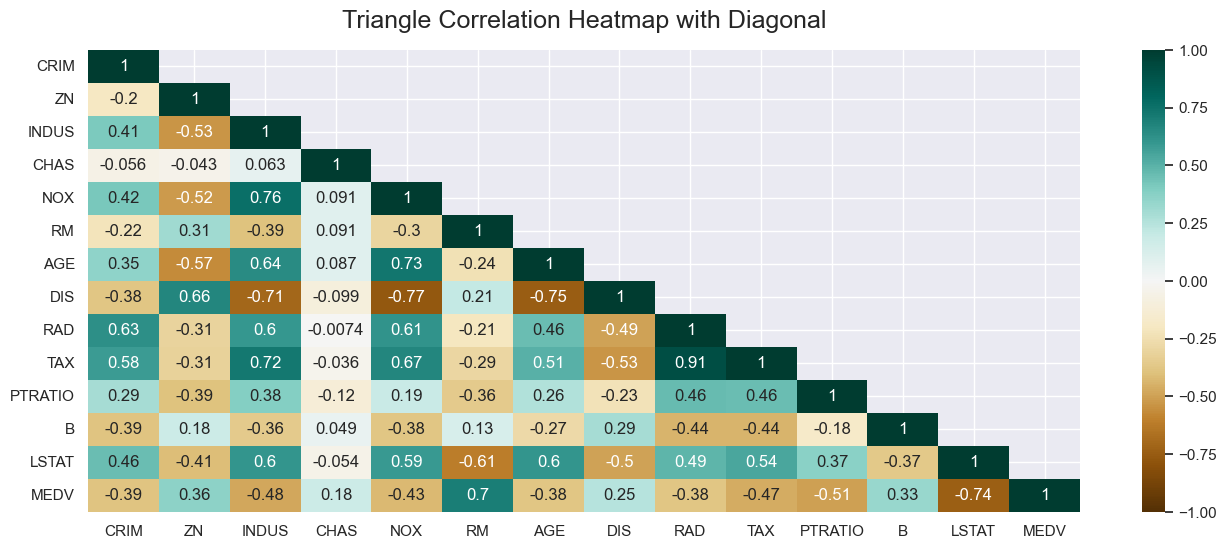

In [31]:
# Calculate correlation matrix
corr = df.corr()

# Create a mask for the upper triangle without the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Optional: If you want to also keep -1 correlations visible, you would need to identify these specifically.
# This can get complex if you're looking for exactly -1, given floating point arithmetic.
# An example approach (not shown here) could involve setting mask elements to False where corr == -1.

plt.figure(figsize=(16, 6))

# Create the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap with Diagonal', fontdict={'fontsize':18}, pad=16)
plt.show()

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

**Observations:**   
To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).  
An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD and TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model.   
Same goes for the features DIS and AGE which have a correlation of -0.75.  
Based on the above observations we will use RM and LSTAT as our features.   

Using a scatter plot let’s see how these features vary with MEDV.


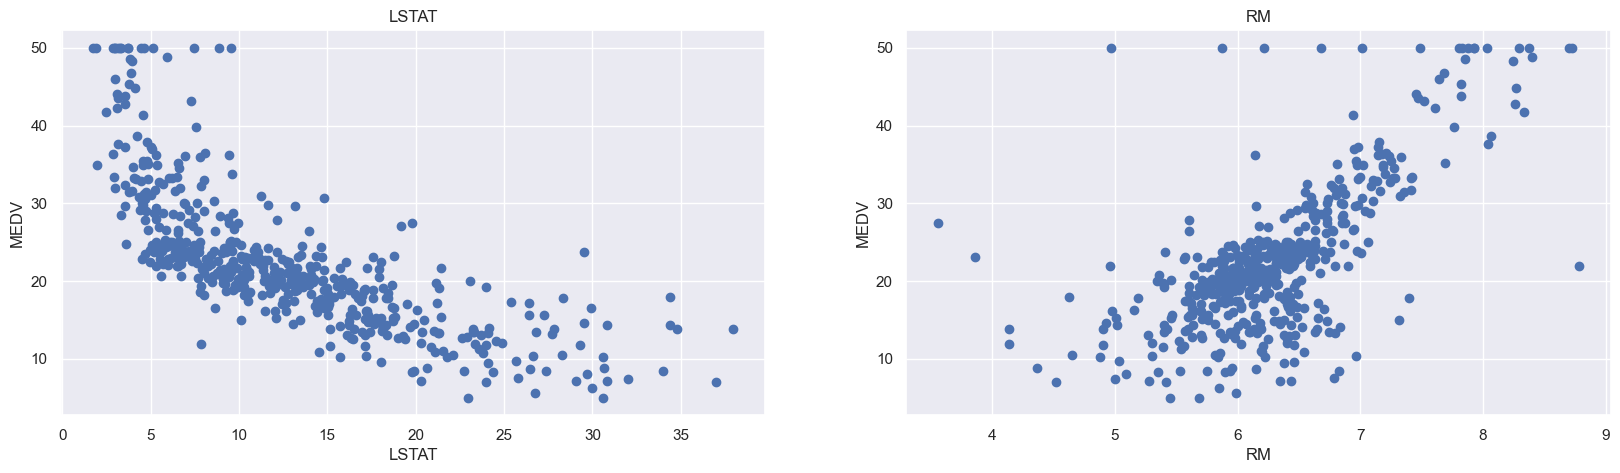

In [9]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

#this loop is drawing both charts
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Observations:**  
* The prices increase as the value of RM increases linearly.   
* There are few outliers and the data seems to be capped at 50.  
* The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

### Extracting Dependent and Independent Variables

In [10]:
#It is standard practise to use upper case X for the the independent variables
  #and lower case y for the dependent variable

#Assigning 2 columns to X - this will be used to make the prediction
  #You can use as many columns as you wish to help make the prediction
X = df[['LSTAT','RM']]

#This is the target column (what we are trying to predict). It will always be 1 single column. 
y = df['MEDV']

In [11]:
#Display the contents of X 
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [12]:
#Display the contents of y
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### Splitting the Data into Training and Testing Sets

In [13]:
#Split the dataframe for training and testing

#This new library should be included at the top of the Notebook, but for demonstration purposes we are using it here
from sklearn.model_selection import train_test_split

#random-state is needed when we are to run and validate our model multiple times
  #If test_size is 0.2, what does that mean?
  #The code below is using the columns we have specified, and allocating a specified amount of records for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [14]:
#Print the shape of the individual training and testing sets to see the amount of rows and columns in each.
  #Has there been an 80/20 split?
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Fitting the Model to the Training Set

In [15]:
#This new library should be included at the top of the Notebook, but for demonstration purposes we are using it here
  #Different libraries are required, depending on your choice of algorithm
from sklearn.linear_model import LinearRegression

#Assign the linear regression function to a variable
lin_model = LinearRegression()
#Fit the model to the training data so that the model can learn
lin_model.fit(X_train, y_train)

LinearRegression()

### Predicting, & Evaluating the Model

In [16]:
#These new libraries should be included at the top of the Notebook, but for demonstration purposes we are using them here
  #These are special libraries for evaluating the success of our model
from sklearn import metrics
from sklearn.metrics import r2_score
    
#Make predictions using the test dataset
y_test_predict = lin_model.predict(X_test)

#Calculating the Root Mean Square Error
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
#Calculating the R-Squared value
r2 = r2_score(y_test, y_test_predict)

#Print the results
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


## Understanding the Results

#### WHAT IS MSE?( Mean Square Error)  WHAT IS THE RMSE?  
In classification problems, the accuracy score is used as a measure to calculate the performance of a model and the confusion matrix is used to evaluate the model. Just like classification, in regression problems, the RMSE score is used as a metric to measure performance and the mean squared error (MSE) is used to evaluate the performance of a regression model.  

In regression, you don't want to think about whether an example is "correct" or "incorrect" but rather how close it was to the true target value

The mean squared error (MSE) determines the distance between the set of points and the regression line by taking the distances from the set of points to the regression line and then swapping them. Distances are nothing but errors. Squaring is only done to remove negative values and to give more weight to larger differences.

If the MSE score value is smaller it means you are very close to determining the best fit line which also depends on the data you are working on, so sometimes it may not be possible to get a small MSE score value. 

The benchmark of random guessing should get you an RMSE = standard_deviation. So lower than this, your model is demonstrating some ability to learn; above that number, you haven't even learned to guess the mean correctly.

#### USING RMSE  - it is often used to assess the success of the model  
**It is important to remember that there is no absolute good or bad threshold for the RMSE value, however you can define it based on your Dependent Variable - the variable that you are trying to predict. For data which ranges from 0 to 1000, an RMSE of 0.7 is small, but if the range goes from 0 to 1, it is not that small anymore**. Look at the values that we are trying to predict here. Is the RMSE value good or poor?

#### WHAT IS THE R2 SCORE?  (Also known as  the coefficient of determination )
After you fit a linear model using regression analysis, you need to determine how well the model fits the data. R-squared is a statistical measure that represents the goodness of fit of a regression model. **The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted**.  

R-squared is a statistical measure of how close the data are to the fitted regression line. In general, a model fits the data well if the differences between the observed values and the model's predicted values are small and unbiased.   

R-square is a comparison of residual sum of squares (SSres) with total sum of squares(SStot).  
* Total sum of squares is calculated by summation of squares of perpendicular distance between data points and the average line. These score tell you how close your model is at predicting
* Residual sum of squares in calculated by the summation of squares of perpendicular distance between data points and the best fitted line  
The goodness of fit of regression models can be analyzed on the basis of R-square method. The more the value of r-square near to 1, the better is the model.

Note : The value of R-square can also be negative when the models fitted is worse than the average fitted model.


**ARE LOW R-SQUARED VALUES INHERENTLY BAD?**
No! There are two major reasons why it can be just fine to have low R-squared values.

* In some fields, it is entirely expected that your R-squared values will be low. For example, any field that attempts to predict human behavior, such as psychology, typically has R-squared values lower than 50%. Humans are simply harder to predict than, say, physical processes.
* Furthermore, if your R-squared value is low but you have statistically significant predictors, you can still draw important conclusions about how changes in the predictor values are associated with changes in the response value. Regardless of the R-squared, the significant coefficients still represent the mean change in the response for one unit of change in the predictor while holding other predictors in the model constant. Obviously, this type of information can be extremely valuable.  

A low R-squared is most problematic when you want to produce predictions that are reasonably precise (have a small enough prediction interval). How high should the R-squared be for prediction? Well, that depends on your requirements for the width of a prediction interval and how much variability is present in your data. While a high R-squared is required for precise predictions, it’s not sufficient by itself

#### The content below has been included to help you understand what is happening
#### We would not do this in our assignments

In [17]:
#View the top ten records in the test dataset used for making the prediction
X_test[:10]

,LSTAT,RM
226,3.13,8.040
292,4.70,6.630
90,8.81,6.417
373,34.77,4.906
273,6.58,7.691
417,26.64,5.304
503,5.64,6.976
234,8.05,6.726
111,10.16,6.715
472,14.36,6.437


In [18]:
#View the top ten values in the test dataset that show the original (true) value - the price of property
y_test[:10]

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
417    10.4
503    23.9
234    29.0
111    22.8
472    23.2
Name: MEDV, dtype: float64

In [19]:
#View the top ten predicted values generated by the model 
  #How they compare to the original values
y_test_predict[:10]

array([37.38999403, 29.79290611, 25.86755297,  0.31370828, 33.31385559,
        7.97136102, 30.7066387 , 27.83076842, 26.26693081, 21.97871678])

In [20]:
#Pass paramenters to the model to make predictions
#I have used values from above for demo purposes but you can use whatever you like

#One set of paramters
predictions = lin_model.predict([[6.58, 7.691]])

#Two sets of paramters
# predictions = lin_model.predict([[6.58, 7.691],[26.64, 5.304]])

#Display the predictions
predictions

c:\Users\JordanFujitsu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33.31385559])